In [22]:
from dirmaths import *
import numpy as np

ModuleNotFoundError: No module named 'S2TP1'

1. Coloration de sommets  
    1.1 Paramètre color

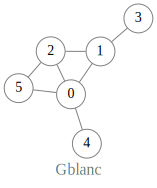

In [2]:
Mat = np.array([[0,1,1,0,1,1],[1,0,1,1,0,0],[1,1,0,0,0,1],[0,1,0,0,0,0],[1,0,0,0,0,0],[1,0,1,0,0,0]])
display(Mat,directed=False,title="Gblanc")

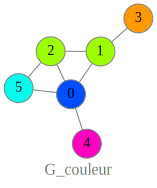

In [3]:
liste_couleur = [5,2,2,1,7,4]
display(Mat,directed=False,color=liste_couleur,title="G_couleur")

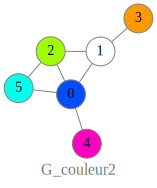

In [4]:
#le nombre 0 correpond au blanc : on l'utilisera comme absence de couleur
couleur2 = [5,0,2,1,7,4]
display(Mat,directed=False,color=couleur2,title="G_couleur2")


    1.2 Exercices de coloration  
        1.2.1 Exercice1

[1, 0, 2, 0, 3, 0]


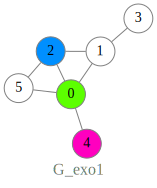

In [7]:
def exo1(M,sommets):
    colors=[]
    for i in range(len(M)):
        colors.append(0)
    i=1
    for sommet in sommets:
        colors[sommet]=i
        i+=1
    return colors
couleur_exo1 = exo1(Mat,[0,2,4])
print(couleur_exo1)
display(Mat,directed=False,color=couleur_exo1,title="G_exo1")

1.2.2 Exercice 2

[2, 3, 1, 0, 0, 4]


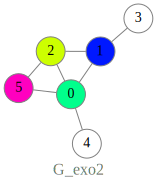

In [10]:
def exo2(M,x):
    colors=[]
    for i in range(len(M)):
        colors.append(0)
    i=2
    colors[x]=1
    for j in range(len(M)):
        if M[x,j]!=0:
            colors[j]=i
            i+=1
    return colors
couleur_exo2 = exo2(Mat,2)
print(couleur_exo2)
display(Mat,directed=False,color=couleur_exo2,title="G_exo2")

1.2.3 Exercice 3

In [12]:
def exo3(M):
    colors=[]
    degs=[]
    for i in range(len(M)):
        degs.append(degre(M,i))
        colors.append(0)
    mins=[degs[0]]
    maxs=[degs[0]]
    for elt in degs:
        if elt<mins:
            mins=elt
        if elt>maxs:
            maxs=elt
    for elt in maxs:
        colors[elt]=5
    for elt in mins:
        colors[elt]=1
    return colors
couleur_exo3 = exo3(Mat)
print(couleur_exo3)
display(Mat,directed=False,color=couleur_exo3,title="G_exo3")

NameError: name 'degre' is not defined